In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [ ]:
loan_data = pd.read_csv("/content/train_u6lujuX_CVtuZ9i (1).csv")

In [ ]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
loan_data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
# Define the imputer for categorical variables using 'most_frequent'
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Define the imputer for numerical variables using 'median'
numerical_imputer = SimpleImputer(strategy='median')

# Columns that are categorical
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed']

# Columns that are numerical
numerical_cols = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']

In [ ]:
loan_data[categorical_cols] = categorical_imputer.fit_transform(loan_data[categorical_cols])

In [ ]:
loan_data[numerical_cols] = numerical_imputer.fit_transform(loan_data[numerical_cols])

In [ ]:
loan_data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
svm = svm.SVC(kernel='linear', class_weight='balanced')

In [ ]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
loan_data['Loan_Status'] = loan_data['Loan_Status'].map({'Y': 1, 'N': 0})

In [ ]:
loan_data['Loan_Status'].value_counts()

,count
Loan_Status,
1,422
0,192


In [ ]:
loan_data['Dependents'] = loan_data['Dependents'].replace('3+', 4)

In [ ]:
loan_data['Dependents'].value_counts()

,count
Dependents,
0,360
1,102
2,101
4,51


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Education', ylabel='count'>

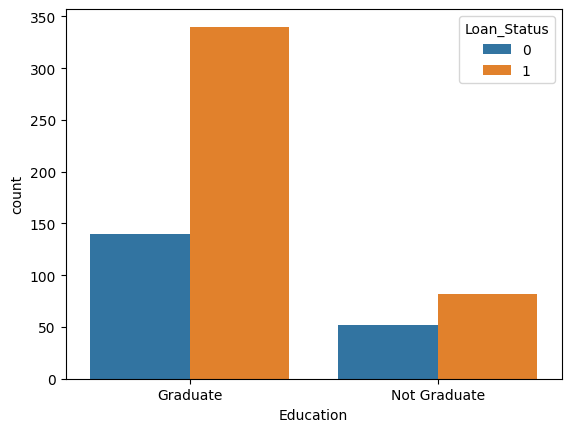

In [ ]:
sns.countplot(x='Education', hue='Loan_Status', data=loan_data)

In [ ]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [ ]:
loan_data['Married'] = loan_data['Married'].map({ "Yes": 1, "No": 0 })

In [ ]:
loan_data['Married'].value_counts()

,count
Married,
1,401
0,213


In [ ]:
loan_data['Gender'] = loan_data['Gender'].map({ "Male": 1, "Female": 0 })

In [28]:
loan_data['Self_Employed'] = loan_data['Self_Employed'].map({ "Yes": 1, "No": 0 })

In [29]:
loan_data['Education'] = loan_data['Education'].map({ "Graduate": 1, "Not Graduate": 0 })

In [30]:
loan_data['Property_Area'] = loan_data['Property_Area'].map({ "Urban": 0, "Rural": 1, "Semiurban": 2 })

In [31]:
loan_data['Property_Area'].value_counts()

,count
Property_Area,
2,233
0,202
1,179


In [32]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,0,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,1


In [33]:
X = loan_data.drop(columns='Loan_Status')

In [34]:
Y = loan_data['Loan_Status']

In [35]:
Y.head()

,Loan_Status
0,1
1,0
2,1
3,1
4,1


In [36]:
X = X.drop(columns='Loan_ID')

In [37]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,0
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,0
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,0


In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [40]:
svm.fit(X_train, Y_train)

SVC(class_weight='balanced', kernel='linear')

In [41]:
svm.score(X_train, Y_train)

0.6924643584521385

In [43]:
X_train_prediction = svm.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
training_data_accuracy

0.6924643584521385

In [44]:
X_test_prediction = svm.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
test_data_accuracy

0.6747967479674797